In [1]:
from utils import *
import json

In [2]:
flt_auth_exp = load_file('data/flt_auth_exp.pickle')

In [3]:
# k2emb = load_file('data/k2emb.pickle')

In [4]:
papers = get_papers_dict()

100%|███████████████████████████████████████████████████████████| 2068280/2068280 [00:55<00:00, 37214.10it/s]


In [21]:
# a = papers[40]['journal-ref']

In [58]:
# a = 'aaaaaaaaa,2,\n-()'

In [59]:
import re
re.findall(r'[0-9]|,|\n|\(|-',a)

[',', '2', ',', '\n', '-', '(']

In [79]:
from fuzzywuzzy import fuzz

In [82]:
def get_j_list(j_l_path = 'journal_lists.txt'):
    with open(j_l_path,'r') as file:
        lines = file.readlines()
        j_list = []
        for line in lines:
            line = line[:-1].split('\t')
            j_list.append(line)
        file.close()
    return j_list

j_list = get_j_list()

def j_name_align(s,j_list):
    m = 0
    j_name = 0
    for j in j_list:
        for name in j:
            sim = fuzz.ratio(s,name)
            if sim>m:
                m = sim
                j_name = j[0]
    return j_name

In [83]:
key_dict_conf = {}
no_j_c = 0
for paper in tqdm(papers):
    journal_conf=paper['journal-ref']
    if journal_conf:
        j_s = paper['journal-ref']
        spls = re.findall(r'[0-9]|,|\n|\(|-|\\',j_s)
        if nums:
            journal_conf = j_s.split(spls[0])[0]
            journal_conf = j_name_align(journal_conf,j_list)
        if journal_conf not in key_dict_conf.keys():
            key_dict_conf[journal_conf] = []

        key_dict_conf[journal_conf] += paper['categories'].split(' ')
    else:
        no_j_c+=1

  0%|                                                              | 2581/2068280 [00:52<11:41:18, 49.09it/s]


KeyboardInterrupt: 

In [85]:
len(key_dict_conf)

205

In [ ]:
key_dict_conf['']

In [41]:
import matplotlib.pyplot as plt
def draw_count(count_list):
    plt.hist(count_list,bins=100)
    plt.show()         

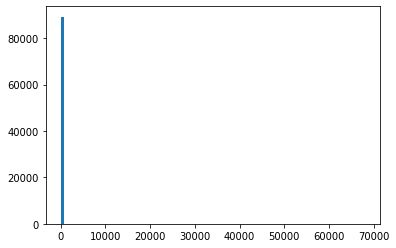

In [42]:
c = []
for key,val in key_dict_conf.items():
    c.append(len(val))
draw_count(c)